<a href="https://colab.research.google.com/github/Julia-Vanyarina/neiro/blob/main/_Lab5_Using_Convolutions_With_Complex_Images_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Использование свертки со сложными изображениями

В предыдущих лабораториях вы использовали набор данных Fashion MNIST для обучения классификатора изображений. В этом случае у вас были изображения размером 28x28, где объект был сосредоточен. В этой лабораторной работе вы перейдете на следующий уровень, научившись распознавать особенности на изображении, где объект может находиться * в любом месте * изображения!

Вы сделаете это, создав классификатор лошадей или людей, который сообщит вам, содержит ли данное изображение лошадь или человека, где сеть обучена распознавать признаки, которые определяют, кто есть кто.


В случае Fashion MNIST данные были встроены в TensorFlow через Keras. В этом случае данных нет, поэтому вам придется выполнить некоторую обработку, прежде чем вы сможете обучаться.

Во-первых, давайте загрузим данные:



In [1]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2025-04-08 07:17:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-08 07:17:38 ERROR 404: Not Found.



In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

BadZipFile: File is not a zip file

In [3]:
import tensorflow_datasets as tfds
ds = tfds.load('horses_or_humans', split='train', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.Y4RYLM_3.0.0/horses_or_humans-train.tfrecord*.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.Y4RYLM_3.0.0/horses_or_humans-test.tfrecord*..…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [4]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

# Загрузка датасета
ds = tfds.load('horses_or_humans', split='train+test')

# Преобразуем в numpy для удобства
images = []
labels = []
for example in ds:
    images.append(example["image"].numpy())
    labels.append(example["label"].numpy())

# Разделяем данные на train и validation (80% / 20%)
train_images, val_images, train_labels, val_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Создаем директории
def create_dirs(base_dir):
    horse_dir = os.path.join(base_dir, 'horses')
    human_dir = os.path.join(base_dir, 'humans')
    os.makedirs(horse_dir, exist_ok=True)
    os.makedirs(human_dir, exist_ok=True)
    return horse_dir, human_dir

# Папки для тренировочных данных
train_base_dir = '/tmp/horse-or-human'
train_horse_dir, train_human_dir = create_dirs(train_base_dir)

# Папки для валидационных данных
val_base_dir = '/tmp/validation-horse-or-human'
val_horse_dir, val_human_dir = create_dirs(val_base_dir)

# Сохраняем тренировочные данные
for i, (image, label) in enumerate(zip(train_images, train_labels)):
    if label == 0:
        tf.keras.utils.save_img(f"{train_horse_dir}/horse_{i}.jpg", image)
    else:
        tf.keras.utils.save_img(f"{train_human_dir}/human_{i}.jpg", image)

# Сохраняем валидационные данные
for i, (image, label) in enumerate(zip(val_images, val_labels)):
    if label == 0:
        tf.keras.utils.save_img(f"{val_horse_dir}/horse_{i}.jpg", image)
    else:
        tf.keras.utils.save_img(f"{val_human_dir}/human_{i}.jpg", image)

print("Данные успешно сохранены:")
print(f"Тренировочные лошади: {train_horse_dir}")
print(f"Тренировочные люди: {train_human_dir}")
print(f"Валидационные лошади: {val_horse_dir}")
print(f"Валидационные люди: {val_human_dir}")

Данные успешно сохранены:
Тренировочные лошади: /tmp/horse-or-human/horses
Тренировочные люди: /tmp/horse-or-human/humans
Валидационные лошади: /tmp/validation-horse-or-human/horses
Валидационные люди: /tmp/validation-horse-or-human/humans


In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2025-04-08 07:18:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-08 07:18:29 ERROR 404: Not Found.

--2025-04-08 07:18:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-08 07:18:29 ERROR 404: Not Found.



Следующий код Python будет использовать библиотеку OS для использования библиотек операционной системы, предоставляя вам доступ к файловой системе, и библиотеку zipfile, позволяющую вам разархивировать данные.

Содержимое .zip извлекается в базовый каталог `/tmp/horse-or-human`, каждый из которых, в свою очередь, содержит подкаталоги `horses` и `humans`.

Короче говоря, обучающий набор - это данные, которые используются для того, чтобы сообщить нейросетевой модели, что "вот как выглядит лошадь", "вот как выглядит человек" и т.д.

В этом примере следует обратить внимание на одну вещь: мы явно не обозначаем изображения как лошадей или людей. Если вы помните, в предыдущем примере с модой мы пометили "это 1", "это 7" и т.д.

Позже вы увидите, что используется нечто под названием * ImageGenerator * - и это закодировано для чтения изображений из подкаталогов и автоматического помечения их именем этого подкаталога. Так, например, у вас будет каталог "обучение", содержащий каталог "лошади" и каталог "люди". ImageGenerator пометит изображения соответствующим образом для вас, сократив шаг кодирования.

Давайте определим каждый из этих каталогов:

In [6]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Следующий код Python будет использовать библиотеку OS для использования библиотек операционной системы, предоставляя вам доступ к файловой системе, и библиотеку zipfile, позволяющую вам разархивировать данные.

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse_985.jpg', 'horse_311.jpg', 'horse_108.jpg', 'horse_274.jpg', 'horse_627.jpg', 'horse_810.jpg', 'horse_926.jpg', 'horse_685.jpg', 'horse_122.jpg', 'horse_523.jpg']
['human_845.jpg', 'human_809.jpg', 'human_659.jpg', 'human_258.jpg', 'human_76.jpg', 'human_141.jpg', 'human_446.jpg', 'human_843.jpg', 'human_767.jpg', 'human_425.jpg']


Давайте узнаем общее количество изображений лошадей и людей в каталогах:

In [8]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 505
total training human images: 521


Теперь давайте взглянем на несколько фотографий, чтобы лучше понять, как они выглядят. Сначала настройте параметры matplot:

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Теперь отобразите серию из 8 изображений лошади и 8 изображений человека. Вы можете повторно запускать ячейку, чтобы каждый раз видеть новую серию:

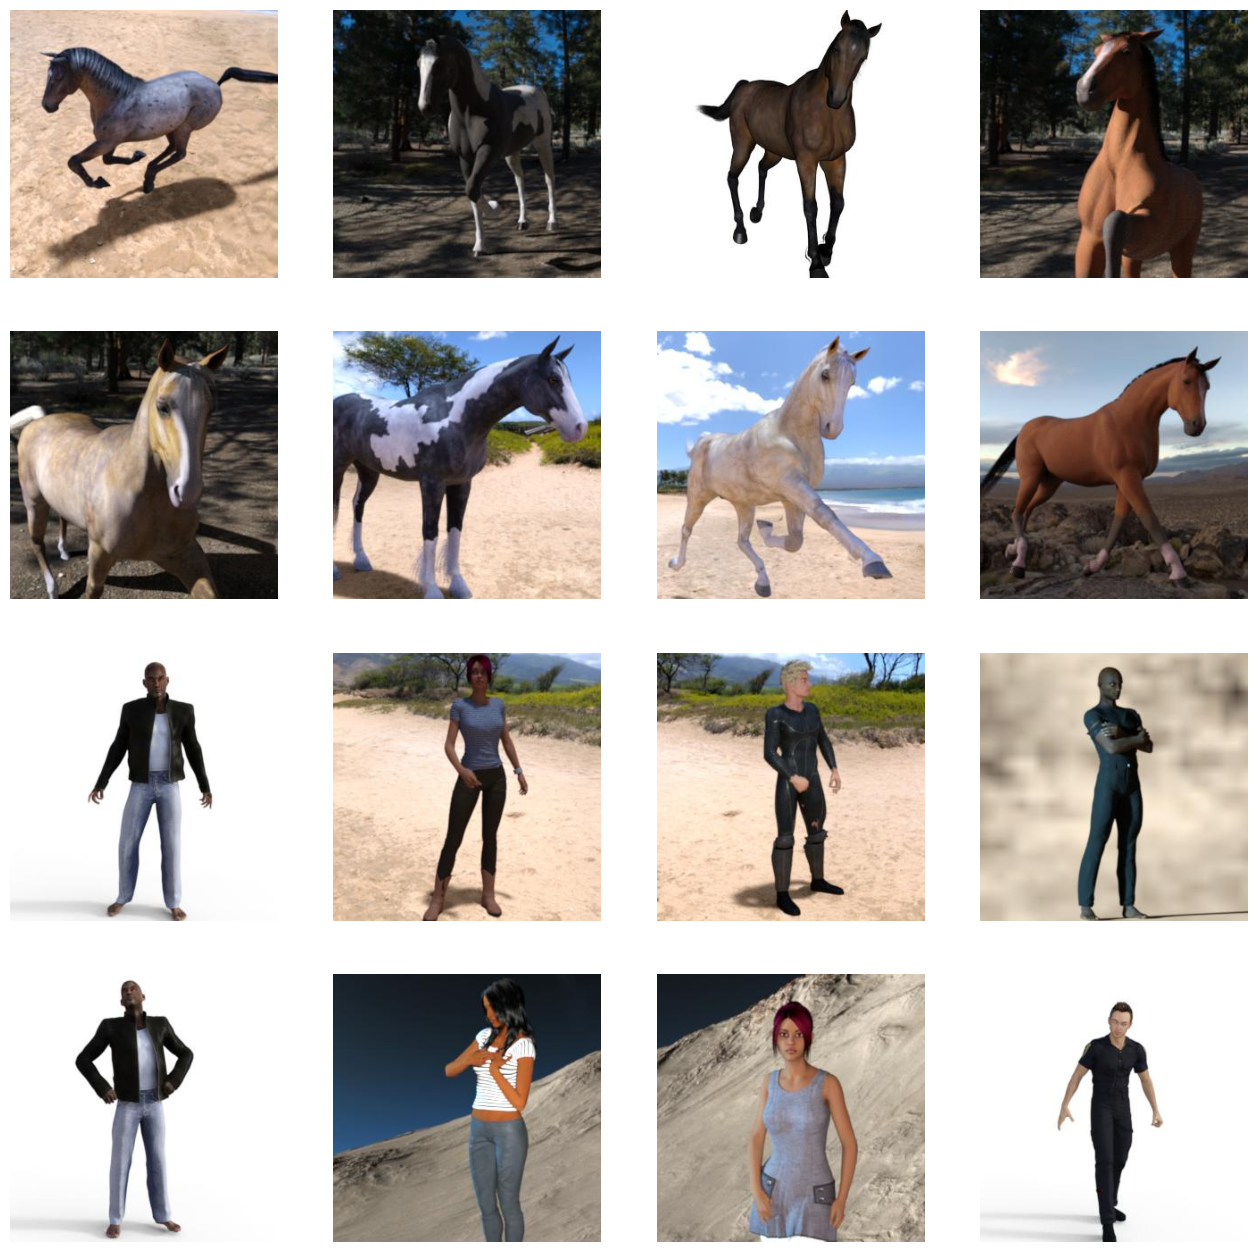

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Построение небольшой модели с нуля

Но прежде чем мы продолжим, давайте начнем определять модель:

Шагом 1 будет импорт tensorflow.

In [11]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [12]:
import tensorflow as tf
print(tf.__version__)

2.18.0


Затем мы добавляем сверточные слои, как в предыдущем примере, и сглаживаем конечный результат, чтобы поместить его в плотно соединенные слои.

Наконец, мы добавляем плотно соединенные слои.

Обратите внимание, что, поскольку мы сталкиваемся с проблемой двухклассовой классификации, т. Е. С * Проблемой бинарной классификации *, мы завершим нашу сеть активацией [* сигмоида *] (https://wikipedia.org/wiki/Sigmoid_function ), так что на выходе нашей сети будет единственный скаляр между 0 и 1, кодирующий вероятность того, что текущее изображение относится к классу 1 (в отличие от класса 0).

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Вызов метода model.summary() выводит сводку NN

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 78400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      40,141,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,165,409 (153.22 MB)

 Trainable params: 40,165,409 (153.22 MB)

 Non-trainable params: 0 (0.00 B)

Столбец "выходная форма" показывает, как изменяется размер вашей карты объектов в каждом последующем слое. Слои свертки немного уменьшают размер карт объектов за счет заполнения, а каждый слой объединения уменьшает размеры вдвое.

Далее мы настроим спецификации для обучения модели. Мы будем обучать нашу модель с потерей `binary_crossentropy`, потому что это проблема бинарной классификации, и наша конечная активация - сигмоидальная. (Для получения дополнительной информации о показателях потерь см. [Сбой машинного обучения Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) Мы будем использовать оптимизатор `rmsprop` со скоростью обучения `0.001`. Во время обучения мы захотим отслеживать классификацию ...://википедия.org/wiki/Stochastic_gradient_descent#RMSProp) предпочтительнее [стохастического градиентного спуска](https://developers.google.com/machine-learning/glossary/#SGD ) (SGD), потому что RMSProp автоматизирует для нас настройку скорости обучения. (Другие оптимизаторы, такие как [Adam] (https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) и [Adagrad] (https://developers.google.com/machine-learning/glossary/#AdaGrad), также автоматически адаптируют скорость обучения во время обучения и будут одинаково хорошо работать здесь.)

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),  # ← Исправлено здесь
    metrics=['accuracy']
)

### Предварительная обработка данных

Давайте настроим генераторы данных, которые будут считывать изображения в наших исходных папках, преобразовывать их в тензоры `float32` и передавать их (с их метками) в нашу сеть. У нас будет один генератор для обучающих изображений и один для проверочных изображений. Наши генераторы будут выдавать пакеты изображений размером 300x300 и их метки (двоичные).

Как вы, возможно, уже знаете, данные, поступающие в нейронные сети, обычно должны быть каким-то образом нормализованы, чтобы сделать их более удобными для обработки сетью. ...`evaluate_generator" и `predict_generator".

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1026 images belonging to 2 classes.
Found 257 images belonging to 2 classes.


### Тренировка
Давайте потренируемся в течение 15 эпох - это может занять несколько минут.

Обратите внимание на значения для каждой эпохи.

Потери и точность являются отличным показателем прогресса в обучении. Он делает предположение относительно классификации обучающих данных, а затем сравнивает его с известной меткой и вычисляет результат. Точность - это доля правильных предположений.

In [17]:
history = model.fit(
      train_generator,
      validation_data = validation_generator,
      epochs=15,
      steps_per_epoch=8,
      validation_steps=8,
      verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 838ms/step - accuracy: 0.5315 - loss: 2.9307 - val_accuracy: 0.5234 - val_loss: 0.6721
Epoch 2/15
1/8 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.5469 - loss: 0.6683

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.5469 - loss: 0.6683 - val_accuracy: 0.5312 - val_loss: 0.6600
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5982 - loss: 0.6430 - val_accuracy: 0.5273 - val_loss: 0.6640
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.6172 - loss: 0.6435 - val_accuracy: 0.6797 - val_loss: 0.6385
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 510ms/step - accuracy: 0.7194 - loss: 0.6356 - val_accuracy: 0.9023 - val_loss: 0.3980
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.9062 - loss: 0.3487 - val_accuracy: 0.5469 - val_loss: 0.7401
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 554ms/step - accuracy: 0.7537 - loss: 0.4365 - val_accuracy: 0.8867 - val_loss: 0.4177
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.8750 - loss: 0.4044 - val_accuracy: 0.9180 - val_loss: 0.3495
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 688ms/step - accuracy: 0.8344 - loss: 0.6868 - val_accuracy: 0.9141 - val_loss: 0.3259
Epoc

###Запуск модели

Теперь давайте посмотрим, как на самом деле выполняется прогноз с использованием модели. Этот код позволит вам выбрать 1 или более файлов из вашей файловой системы, затем он загрузит их и прогонит через модель, давая понять, является ли объект лошадью или человеком.

Вы можете загружать изображения из Интернета в свою файловую систему, чтобы опробовать их!

Обратите внимание, что вы можете заметить, что сеть допускает МНОГО ошибок, несмотря на ... Существует множество методов, которые можно использовать, чтобы улучшить ваше обучение, несмотря на ограниченные данные, включая то, что называется увеличением изображения. Это выходит за рамки данной лаборатории!

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving hourse.jpg to hourse.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
[0.00312996]
hourse.jpg is a horse


### Визуализация промежуточных представлений

Чтобы получить представление о том, каким функциям научилась наша convnet, можно сделать одну забавную вещь - визуализировать, как входные данные преобразуются по мере прохождения через convnet.

Давайте выберем случайное изображение из обучающего набора, а затем сгенерируем рисунок, где каждая строка является результатом слоя, а каждое изображение в строке является определенным фильтром в этой выходной карте объектов. Повторно запустите эту ячейку, чтобы сгенерировать промежуточные представления для множества обучающих изображений.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


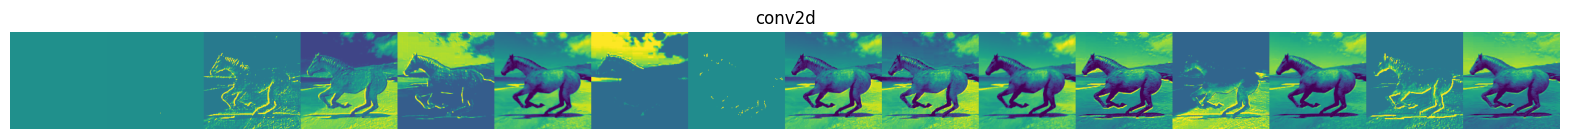

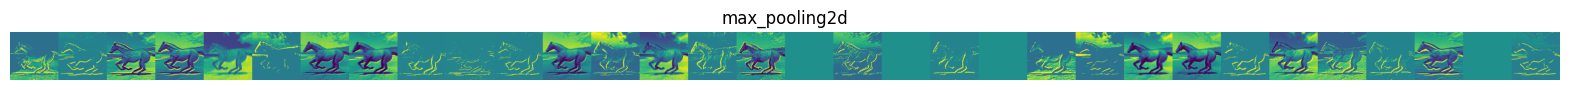

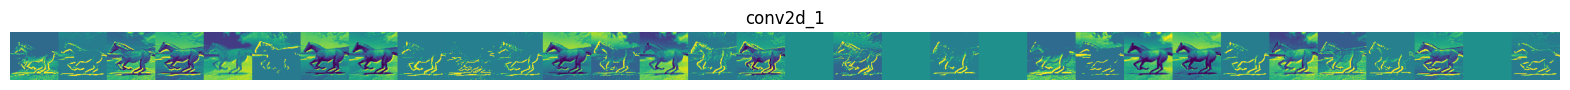

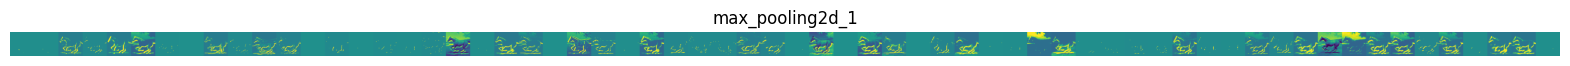

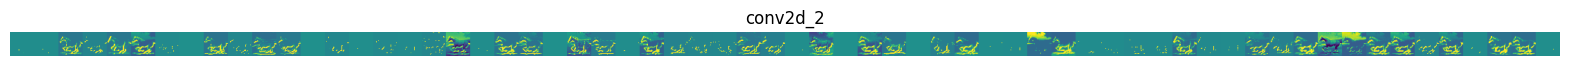

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf

# Создаем случайный тензор с правильной формой (1, 300, 300, 3)
dummy_input = tf.random.normal([1, 300, 300, 3])

# Пропускаем его через модель (без обучения)
_ = model.predict(dummy_input)

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(
    inputs=model.get_layer(index=0).input,
    outputs=successive_outputs
)

# Загружаем случайное изображение
img_path = random.choice([
    os.path.join(train_horse_dir, f) for f in os.listdir(train_horse_dir)
] + [
    os.path.join(train_human_dir, f) for f in os.listdir(train_human_dir)
])
img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img) / 255.0  # Нормализация
x = np.expand_dims(x, axis=0)  # Добавляем batch-размер

# Получаем feature maps
feature_maps = visualization_model.predict(x)

# Визуализация
for layer_name, feature_map in zip([layer.name for layer in model.layers], feature_maps):
    if len(feature_map.shape) == 4:  # Conv/Pooling слои
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x = (x - x.mean()) / (x.std() + 1e-8) * 64 + 128  # Нормализация
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i*size : (i+1)*size] = x
        plt.figure(figsize=(20, 2))
        plt.title(layer_name)
        plt.imshow(display_grid, cmap='viridis')
        plt.axis('off')
plt.show()

Как вы можете видеть, мы переходим от необработанных пикселей изображений ко все более абстрактным и компактным представлениям. Нижестоящие представления начинают выделять то, на что сеть обращает внимание, и они показывают, что "активируется" все меньше и меньше функций; для большинства из них установлено нулевое значение. Это называется "разреженностью". Разреженность представления - ключевая особенность глубокого обучения.


Эти представления содержат все меньше информации об исходных пикселях изображения, но все более точную информацию о классе изображения. Вы можете думать о convnet (или глубокой сети в целом) как о конвейере обработки информации.

## Очистка

Перед выполнением следующего упражнения запустите следующую ячейку, чтобы завершить работу ядра и освободить ресурсы памяти:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)